In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

In [18]:
df = pd.read_csv('reviews-and-ratings.csv')
df.head()

,text,rating
0,"Парфюм оригинальный. Всё, как в профессиональн...",5
1,Мой любимый DKNY. Запах просто шикарный. Спаси...,5
2,NaN,5
3,NaN,5
4,"Запах просто классный, как раз то, что мне нуж...",4


In [19]:
df.dropna(subset=['text', 'rating'], inplace=True)
df['rating'] = pd.to_numeric(df['rating'])
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df.head()

,text,rating,word_count
0,"Парфюм оригинальный. Всё, как в профессиональн...",5,14
1,Мой любимый DKNY. Запах просто шикарный. Спаси...,5,10
4,"Запах просто классный, как раз то, что мне нуж...",4,93
5,"Парфюм хороший, оригинал! Магазин Parfum-Shop-...",5,17
6,Доставка работает супер!,5,3


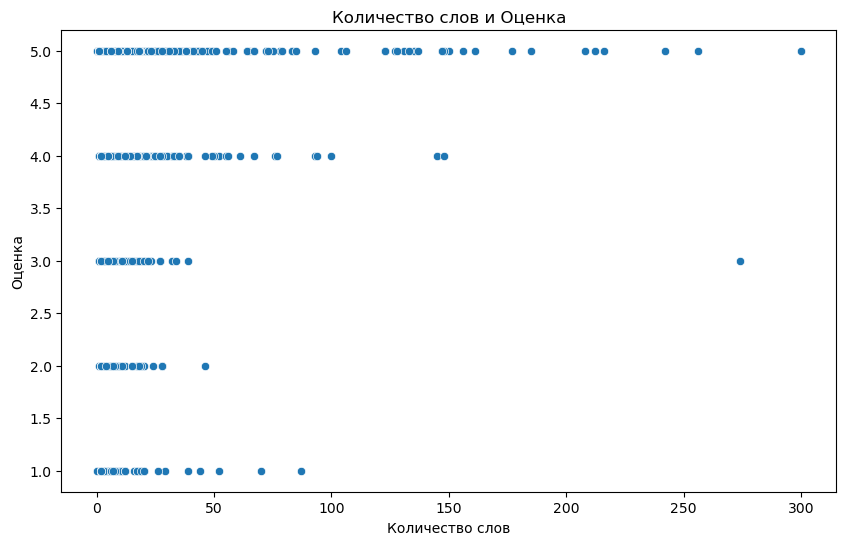

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='rating', data=df)
plt.title('Количество слов и Оценка')
plt.xlabel('Количество слов') 
plt.ylabel('Оценка')
plt.show()

In [14]:
correlation, p_value = pearsonr(df['word_count'], df['rating'])
print(f'Коэффициент корреляции: {correlation}, p-value: {p_value}')

Коэффициент корреляции: -0.028464615378480673, p-value: 0.05489661129222729


In [16]:
X = df['word_count']
y = df['rating']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.687
Date:                Sun, 10 Aug 2025   Prob (F-statistic):             0.0549
Time:                        22:31:55   Log-Likelihood:                -5334.4
No. Observations:                4549   AIC:                         1.067e+04
Df Residuals:                    4547   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7539      0.013    357.868      0.0